<font size=6> <b> 2주차 강의 Notebook </b> </font>
<div class="alert alert-block alert-success">
 이번 시간에는 Python의 데이터 분석 라이브러리인 Pandas를 이용해서, 데이터 파일을 읽어, row/column등을 이용해 <br>통계 값을 구하는 등 기본적인 통계 작업 후 결과물을 다시 파일로 저장하는 법을 배웁니다.<br>
</div>
<p style="text-align:right;"> sumyeon@gmail.com </p>

# What to do

<b> 서울시 2016년 행정구역별 대기 오염 정보 - ex) 일별 미세먼지, 초미세먼지 등 대기 오염 정보, 데이터를 사용해서 <br>
    Data Frame 구조, column 명, 데이터 타입, column 통계 및 특정 조건의 데이터 검색 등 Pandas의 기본 기능을 실습하자
     </b>

<div class="alert alert-block alert-info">
<b> Tip:</b> PM10, PM2.5 등 주요 대기 오염 척도에 대해서 조금 더 알아보자. <br>
   참고 사항으로 관심 없으신 분들은 skip해도 좋습니다.
</div>

In [1]:
# PM : particulate matter , PM10 = particulr size is less than 10 micro-meters
# PM-10 : yearly 50 micro-gram/mxmxm, daily 100 micro-gram/mxmxm
# PM-2.5 : yearly 25 micro-gram/mxmxm, daily 50 micro-gram/mxmxm

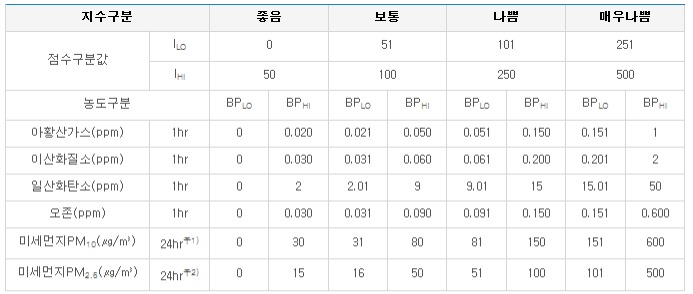

# 분석 환경 설정 (import 등)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<div class="alert alert-block alert-info">
<b> Tip:</b> 앞서 언급한 바와 같이 위 내용은 무조건 Notebook에 처음으로 삽입 후 수행해야함. <br>
    pandas/numpy/pyplot는 각각 분석/수리/Visualization 담당 모듈하는 모듈로 자주 사용하는 모듈임
</div>

# 파일 이름/디렉토리 확인

In [3]:
!cd

Active code page: 65001
D:\jupyternotebook\python_analytics_atoz


In [4]:
!cd ..

Active code page: 65001


In [5]:
# 위에서 change director를 했음에도 현재 디렉토리는 변화가 없다
!cd

Active code page: 65001
D:\jupyternotebook\python_analytics_atoz


<div class="alert alert-block alert-warning">
<b> Warning!!:</b> !cd, !dir 과 같은 명령어는, 해당 명령마다 새로운 command context가 생성되고, 명령어 수행 후 사라짐 <br> 즉, !cd 명령어로는  분석 환경의 current directory를 바꿀 수 없음
</div>

In [6]:
import os
current_dir = os.getcwd()
os.chdir("c:\Temp")
!cd

Active code page: 65001
c:\Temp


In [7]:
os.chdir(current_dir)
!cd

Active code page: 65001
D:\jupyternotebook\python_analytics_atoz


<div class="alert alert-block alert-info">
<b> Tip:</b> 현재 분석용 directory를 바꾸고 싶은 경우에는 위와 같으 os 모듈의 chdir 함수를 사용
</div>

# Data Loading

<b> 서울시 대기 오염 정보 파일을 메모리로 로딩하여, Data Frame을 만든다 </b>

In [8]:
# read csv file into data frame (main memory)
df = pd.read_csv('seoul_air_polution.csv')

<br>
<b> read_csv 함수에는 수 많은 option이 argument의 형태로 존재. 위에서는 기본값을 사용. 아래는 몇 가지 옵션 예</b>

<pre>
df = pd.read_csv('seoul_air_polution.csv', sep=',', skiprows=0, encoding='utf-8', error_bad_lines=True)
</pre>

<div class="alert alert-block alert-info">
<b> Tip:</b> read_csv 이외에도 read_excel, read_sql, read_html, read_json, read_clipborad 등 매우 다양한 로딩 함수가 있다 <br>
    특히, read_clipboard는 현재 clipboard에 카피된 내용을 읽는 기능으로 다른 프로그램에서 작업 중 clipboard를 통해 손쉽게 데이터를 전달할 수 있다.
</div>

# Data Frame : 내용 보기

## show all the rows of data frame 

In [9]:
df

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20171009,강남구,0.024,0.020,0.4,0.007,28.0,22.0
1,20171009,한강대로,0.037,0.019,0.5,0.006,32.0,16.0
2,20171009,중구,0.031,0.025,0.5,0.005,25.0,18.0
3,20171009,마포구,0.021,0.031,0.4,0.006,22.0,19.0
4,20171009,광진구,0.041,0.026,0.8,0.006,25.0,19.0
...,...,...,...,...,...,...,...,...
14269,20161009,구로구,0.011,0.028,0.2,0.004,19.0,9.0
14270,20161009,관악구,0.014,0.032,0.3,0.005,23.0,14.0
14271,20161009,홍릉로,0.022,0.021,0.4,0.006,19.0,11.0
14272,20161009,도산대로,0.023,0.022,0.5,0.004,21.0,8.0


## show the first N (default 5) rows

In [10]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20171009,강남구,0.024,0.020,0.4,0.007,28.0,22.0
1,20171009,한강대로,0.037,0.019,0.5,0.006,32.0,16.0
2,20171009,중구,0.031,0.025,0.5,0.005,25.0,18.0
3,20171009,마포구,0.021,0.031,0.4,0.006,22.0,19.0
4,20171009,광진구,0.041,0.026,0.8,0.006,25.0,19.0


## show the last N (default 5) rows

In [11]:
# shows the last 5 rows of data frame
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
14269,20161009,구로구,0.011,0.028,0.2,0.004,19.0,9.0
14270,20161009,관악구,0.014,0.032,0.3,0.005,23.0,14.0
14271,20161009,홍릉로,0.022,0.021,0.4,0.006,19.0,11.0
14272,20161009,도산대로,0.023,0.022,0.5,0.004,21.0,8.0
14273,20161009,서초구,0.012,0.029,0.4,0.004,20.0,9.0


In [12]:
type(df)

pandas.core.frame.DataFrame

## Data Frame?

<b> DataFrame은 Pandas에서 데이터를 다루는 가장 기본적인 구조. (참조 : DataFrame의 한 개 column은 Series)

<b> Series는 DataFrame과 동일하나 하나의 값만을 다루는 구조임. DataFrame의 개별 column들은 각각이 Series임.

<img src="https://www.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png" width="800" height="600">Data Frame Conceptual Structure</img>

<div class="alert alert-block alert-info">
<b> Tip:</b> Dataframe은 index 값이 중복될 수 있다는 점을 제외하고는 DB의 table개념과 매우 유사함 </b>
</div>

# Data Frame : 구조 확인

<b> Dataframe의 내용은 쉽게 확인 할 수 있었는데, 사이즈나 크기 등 그 구조는 어떻게 확인 하는지? </b>

In [13]:
# print the row, column shape of data frame
df.shape

(14274, 8)

In [14]:
# list the detailed information of columns and data frames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14274 entries, 0 to 14273
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          14274 non-null  int64  
 1   측정소명          14274 non-null  object 
 2   이산화질소농도(ppm)  14171 non-null  float64
 3   오존농도(ppm)     14181 non-null  float64
 4   일산화탄소농도(ppm)  14171 non-null  float64
 5   아황산가스(ppm)    14186 non-null  float64
 6   미세먼지(㎍/㎥)     14213 non-null  float64
 7   초미세먼지(㎍/㎥)    13314 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 892.2+ KB


In [15]:
# list the data type of columns
df.dtypes

측정일시              int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
dtype: object

# Data Frame : Columns

In [16]:
# shows the columns
df.columns

Index(['측정일시', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)',
       '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'],
      dtype='object')

In [17]:
# select one columns from data frame = Series!!
ser = df['일산화탄소농도(ppm)']
ser

0        0.4
1        0.5
2        0.5
3        0.4
4        0.8
        ... 
14269    0.2
14270    0.3
14271    0.4
14272    0.5
14273    0.4
Name: 일산화탄소농도(ppm), Length: 14274, dtype: float64

In [18]:
type(ser)

pandas.core.series.Series

<div class="alert alert-block alert-info">
<b> Tip:</b> Data Frame의 column 각각은 Series라 불리는 구조로 이루어져 있음 <br>
</div>

## Column Statistics 

<b> Dataframe의 전체 column들의 기초 통계를 보여준다. 참고로, 숫자 형태의 column에 대해서만 적용됨 </b>

In [19]:
# list the basic statistics of each columns
df.describe()

,측정일시,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,1.427400e+04,14171.000000,14181.000000,14171.000000,14186.000000,14213.000000,13314.000000
mean,2.016837e+07,0.036086,0.021621,0.564060,0.004864,48.288961,26.388538
std,3.962950e+03,0.015664,0.012874,0.216054,0.001441,24.599474,14.640890
min,2.016101e+07,0.001000,0.000000,0.100000,0.001000,5.000000,2.000000
25%,2.017011e+07,0.024000,0.012000,0.400000,0.004000,31.000000,16.000000
50%,2.017041e+07,0.034000,0.020000,0.500000,0.005000,45.000000,24.000000
75%,2.017071e+07,0.046000,0.029000,0.700000,0.006000,61.000000,34.000000
max,2.017101e+07,0.140000,0.087000,1.900000,0.013000,243.000000,161.000000


<b> 특정 컬럼의 특정 통계를 보고 싶을때는? </b>

In [20]:
df['일산화탄소농도(ppm)'].mean()  # max(), min(), unique(), nunique(), quantile(), etc.

0.5640604050525765

<b> 특정 컬럼에, distinct (unique한) 값은? 그리고 몇 종류나 되는지? </b>

In [21]:
# distinct 값들 리스트
df['측정소명'].unique()

array(['강남구', '한강대로', '중구', '마포구', '광진구', '강동구', '강남대로', '강서구', '서대문구',
       '도봉구', '구로구', '용산구', '동작대로', '도산대로', '천호대로', '송파구', '성북구', '청계천로',
       '영등포로', '동작구', '양천구', '종로구', '성동구', '관악구', '서초구', '강변북로', '금천구',
       '홍릉로', '강북구', '노원구', '영등포구', '은평구', '동대문구', '중랑구', '종로', '신촌로',
       '공항대로', '정릉로', '화랑로'], dtype=object)

In [22]:
# unique한 값들이 몇 개인지?
df['측정소명'].nunique(), len(df['측정소명'].unique())

(39, 39)

<div class="alert alert-block alert-info">
<b> Tip:</b> len은 python의 builtin 함수로서, python 자료 구조의 length를 return함. Dataframe, Series의 경우에도 사용 가능 </b>
</div>

## column rename

In [23]:
df.columns

Index(['측정일시', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)',
       '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'],
      dtype='object')

In [24]:
# replace column names : assign new column names
df.columns = ['date','loc','NO2','O3','CO','SO2','PM10','PM2.5']
df.columns

Index(['date', 'loc', 'NO2', 'O3', 'CO', 'SO2', 'PM10', 'PM2.5'], dtype='object')

<div class="alert alert-block alert-info">
<b> Tip:</b> 아래 예와 같이 rename 함수를 이용해서 column명을 바꿀 수도 있음  <br>
</div>

In [25]:
df.rename( columns={'O3':'ozone'})

,date,loc,NO2,ozone,CO,SO2,PM10,PM2.5
0,20171009,강남구,0.024,0.020,0.4,0.007,28.0,22.0
1,20171009,한강대로,0.037,0.019,0.5,0.006,32.0,16.0
2,20171009,중구,0.031,0.025,0.5,0.005,25.0,18.0
3,20171009,마포구,0.021,0.031,0.4,0.006,22.0,19.0
4,20171009,광진구,0.041,0.026,0.8,0.006,25.0,19.0
...,...,...,...,...,...,...,...,...
14269,20161009,구로구,0.011,0.028,0.2,0.004,19.0,9.0
14270,20161009,관악구,0.014,0.032,0.3,0.005,23.0,14.0
14271,20161009,홍릉로,0.022,0.021,0.4,0.006,19.0,11.0
14272,20161009,도산대로,0.023,0.022,0.5,0.004,21.0,8.0


## column selection

<b> Dataframe에 있는 여러 column들 중에서 특정 컬럼들만 선택 </b>

In [26]:
# select some columns 
pm10df = df[['date','loc','PM2.5']]
pm10df

,date,loc,PM2.5
0,20171009,강남구,22.0
1,20171009,한강대로,16.0
2,20171009,중구,18.0
3,20171009,마포구,19.0
4,20171009,광진구,19.0
...,...,...,...
14269,20161009,구로구,9.0
14270,20161009,관악구,14.0
14271,20161009,홍릉로,11.0
14272,20161009,도산대로,8.0


<div class="alert alert-block alert-danger">
<b> 절대 주의 !!:</b> Data Frame에서 한 개 이상의 column을 선택하는 경우 무조건 리스트로 column들을 명시해야 함 <br>
PM10df = df['date','loc','PM2.5']는 잘못된 구문임!! 에러!!
</div>

<div class="alert alert-block alert-info">
<b> Tip:</b> 한 개의 column만 선택한 경우, 그 결과는 Series가 된다. 그렇다면 한 개의 column만 있는 Data Frame을 구하는 방법은? 
</div>

## selection by column values

<b> Dataframe에서 특정 컬럼의 value값 조건으로 필요한 부분을 선택 </b>

In [27]:
df[ df['loc'] == '강남구']['PM2.5']

0        22.0
63       12.0
100       5.0
125       5.0
189       6.0
         ... 
14088    21.0
14147    29.0
14190    23.0
14202    12.0
14264    10.0
Name: PM2.5, Length: 366, dtype: float64

<b> 선택한 결과도 Dataframe/Series로 앞서 배운 통계 함수로 기초 통계를 손쉽게 추출 가능 </b>

In [28]:
# sum, mean, std, min, max, count, etc.
df[ df['loc'] == '강남구']['PM2.5'].sum()

9424.0

## groupby operation

<b> 특정 기준에 맞추어 Dataframe 데이터를 grouping 한 후에, 개별 그룹별로 통계를 구하는 경우 사용됨 - SQL이 group-by와 동일한 효과</b>

In [29]:
# shows the statistics by the unique value of columns
df.groupby('loc')['PM2.5'].mean()

loc
강남구     25.748634
강남대로    26.577947
강동구     25.158470
강변북로    26.600775
강북구     22.958678
강서구     24.644809
공항대로    33.093842
관악구     27.769863
광진구     25.822404
구로구     25.092896
금천구     25.721311
노원구     25.300836
도봉구     24.193989
도산대로    25.736842
동대문구    23.560109
동작구     24.793956
동작대로    33.359848
마포구     28.196721
서대문구    24.336066
서초구     23.631148
성동구     25.609290
성북구     26.060000
송파구     23.983607
신촌로     27.891304
양천구     27.669399
영등포구    24.461749
영등포로    30.923954
용산구     25.849727
은평구     24.210959
정릉로     26.349845
종로      29.318885
종로구     25.607143
중구      25.581921
중랑구     26.185792
천호대로    28.283951
청계천로    29.956268
한강대로    28.260536
홍릉로     29.160819
화랑로     26.945736
Name: PM2.5, dtype: float64

In [30]:
# select the median value 
# using the arg of quantile function, can select the 25%, 50%, 75% quantiles
df.groupby('date')['PM2.5'].median()

date
20161009     9.0
20161010    12.0
20161011    23.0
20161012    29.0
20161013    21.0
            ... 
20171005     8.0
20171006     7.0
20171007     6.0
20171008    13.0
20171009    18.0
Name: PM2.5, Length: 366, dtype: float64

In [31]:
# groupby statistics of more than one 
df.groupby('date').agg({'PM2.5':['median','mean','min','max']}).head(10).style.background_gradient(cmap='Blues')

In [32]:
# groupby statistics of more than one 
df.groupby('loc').agg({'PM2.5':['mean'], 'PM10':['mean']}).head(10)

,PM2.5,PM10
,mean,mean
loc,,
강남구,25.748634,47.578947
강남대로,26.577947,58.497253
강동구,25.158470,50.259563
강변북로,26.600775,54.928962
강북구,22.958678,37.426997
강서구,24.644809,48.813187
공항대로,33.093842,67.139344
관악구,27.769863,44.823691


In [33]:
# groupby statistics of more than one 
df.groupby('loc').agg(pm25mean=('PM2.5','mean'), pm10mean=('PM10','mean')).head(10)

,pm25mean,pm10mean
loc,,
강남구,25.748634,47.578947
강남대로,26.577947,58.497253
강동구,25.158470,50.259563
강변북로,26.600775,54.928962
강북구,22.958678,37.426997
강서구,24.644809,48.813187
공항대로,33.093842,67.139344
관악구,27.769863,44.823691
광진구,25.822404,42.377049


<div class="alert alert-block alert-info">
<b> Tip:</b> groupby를 하는 방법이 다양함. 최근에 추천되는 방법인 agg(name=('column','func')) 방식을 강력 추천함  
</div>

# Index 

<b> Dataframe의 row에 대한 key값으로 index라는 것이 존재함. DB의 key값과 유사한 개념이지만 가장 큰 차이점은 index값은 중복이 가능.</b>

## index 설정

<b> 내가 원하는 column을 선택해서 index의 역활을 맡길 수 있음.</b>

In [34]:
# set the 'date' to index values
idf = df.set_index('date')
idf.head(5)

,loc,NO2,O3,CO,SO2,PM10,PM2.5
date,,,,,,,
20171009,강남구,0.024,0.020,0.4,0.007,28.0,22.0
20171009,한강대로,0.037,0.019,0.5,0.006,32.0,16.0
20171009,중구,0.031,0.025,0.5,0.005,25.0,18.0
20171009,마포구,0.021,0.031,0.4,0.006,22.0,19.0
20171009,광진구,0.041,0.026,0.8,0.006,25.0,19.0


<b> 특정 작업 후에 다시 index가 아닌 column으로 활용하고자 할 경우 </b>

In [35]:
idf.reset_index(inplace=True)
idf

,date,loc,NO2,O3,CO,SO2,PM10,PM2.5
0,20171009,강남구,0.024,0.020,0.4,0.007,28.0,22.0
1,20171009,한강대로,0.037,0.019,0.5,0.006,32.0,16.0
2,20171009,중구,0.031,0.025,0.5,0.005,25.0,18.0
3,20171009,마포구,0.021,0.031,0.4,0.006,22.0,19.0
4,20171009,광진구,0.041,0.026,0.8,0.006,25.0,19.0
...,...,...,...,...,...,...,...,...
14269,20161009,구로구,0.011,0.028,0.2,0.004,19.0,9.0
14270,20161009,관악구,0.014,0.032,0.3,0.005,23.0,14.0
14271,20161009,홍릉로,0.022,0.021,0.4,0.006,19.0,11.0
14272,20161009,도산대로,0.023,0.022,0.5,0.004,21.0,8.0


<b> 특정 컬럼값 조건으로 Dataframe를 축소한 결과도 Dataframe. 그러므로 다시 index를 설정 가능 </b>

In [36]:
sdf = idf[idf.date == 20171009].set_index('loc')
sdf.head(5)

,date,NO2,O3,CO,SO2,PM10,PM2.5
loc,,,,,,,
강남구,20171009,0.024,0.020,0.4,0.007,28.0,22.0
한강대로,20171009,0.037,0.019,0.5,0.006,32.0,16.0
중구,20171009,0.031,0.025,0.5,0.005,25.0,18.0
마포구,20171009,0.021,0.031,0.4,0.006,22.0,19.0
광진구,20171009,0.041,0.026,0.8,0.006,25.0,19.0


## Index 기반 selection

<b> Index value에 대한 조건으로 Dataframe의 일부 데이터를 선택 가능하다 </b>

### index의 순서값으로 필요한 데이터를 선택 가능

In [37]:
sdf.iloc[0]

date     2.017101e+07
NO2      2.400000e-02
O3       2.000000e-02
CO       4.000000e-01
SO2      7.000000e-03
PM10     2.800000e+01
PM2.5    2.200000e+01
Name: 강남구, dtype: float64

In [38]:
sdf.iloc[0:10]

,date,NO2,O3,CO,SO2,PM10,PM2.5
loc,,,,,,,
강남구,20171009,0.024,0.020,0.4,0.007,28.0,22.0
한강대로,20171009,0.037,0.019,0.5,0.006,32.0,16.0
중구,20171009,0.031,0.025,0.5,0.005,25.0,18.0
마포구,20171009,0.021,0.031,0.4,0.006,22.0,19.0
광진구,20171009,0.041,0.026,0.8,0.006,25.0,19.0
강동구,20171009,0.030,0.016,0.5,0.005,29.0,16.0
강남대로,20171009,0.047,0.012,0.7,0.005,30.0,17.0
강서구,20171009,0.028,0.021,0.4,0.007,37.0,19.0
서대문구,20171009,0.025,0.022,0.4,0.006,23.0,19.0


### index의 value로 필요한 데이터를 선택 가능

In [39]:
sdf.loc['강남구']

date     2.017101e+07
NO2      2.400000e-02
O3       2.000000e-02
CO       4.000000e-01
SO2      7.000000e-03
PM10     2.800000e+01
PM2.5    2.200000e+01
Name: 강남구, dtype: float64

In [40]:
sdf.loc[ sdf.index > '강남구'].head(2)

,date,NO2,O3,CO,SO2,PM10,PM2.5
loc,,,,,,,
한강대로,20171009,0.037,0.019,0.5,0.006,32.0,16.0
중구,20171009,0.031,0.025,0.5,0.005,25.0,18.0


In [41]:
sdf.loc[ (sdf.index >= '강') & (sdf.index <= '남')].head(5)

,date,NO2,O3,CO,SO2,PM10,PM2.5
loc,,,,,,,
강남구,20171009,0.024,0.020,0.4,0.007,28.0,22.0
광진구,20171009,0.041,0.026,0.8,0.006,25.0,19.0
강동구,20171009,0.030,0.016,0.5,0.005,29.0,16.0
강남대로,20171009,0.047,0.012,0.7,0.005,30.0,17.0
강서구,20171009,0.028,0.021,0.4,0.007,37.0,19.0


## Index + Column 기반 selection

In [42]:
sdf.iloc[0:10, 3]

loc
강남구     0.4
한강대로    0.5
중구      0.5
마포구     0.4
광진구     0.8
강동구     0.5
강남대로    0.7
강서구     0.4
서대문구    0.4
도봉구     0.5
Name: CO, dtype: float64

In [43]:
sdf.loc['강남구', 'PM10']

28.0

In [44]:
sdf.iat[10,5]

23.0

In [45]:
sdf.at['강남구','PM10']

28.0

<div class="alert alert-block alert-info">
<b> Tip:</b> at/iat도 loc/iloc와 유사한 기능을 수행하나 차이점은 at/iat은 하나의 값 (single value)만 인자로 제공가능</b>
</div>

# Iteration

<b> Dataframe의 row/column들을 하나씩 iteration할 수 있다 </b>

## Row iteration

In [46]:
# iterates each row
for index, row in df.head(4).iterrows():          # row is a Series
    print(index, row, type(row))

0 date     20171009
loc           강남구
NO2         0.024
O3           0.02
CO            0.4
SO2         0.007
PM10           28
PM2.5          22
Name: 0, dtype: object <class 'pandas.core.series.Series'>
1 date     20171009
loc          한강대로
NO2         0.037
O3          0.019
CO            0.5
SO2         0.006
PM10           32
PM2.5          16
Name: 1, dtype: object <class 'pandas.core.series.Series'>
2 date     20171009
loc            중구
NO2         0.031
O3          0.025
CO            0.5
SO2         0.005
PM10           25
PM2.5          18
Name: 2, dtype: object <class 'pandas.core.series.Series'>
3 date     20171009
loc           마포구
NO2         0.021
O3          0.031
CO            0.4
SO2         0.006
PM10           22
PM2.5          19
Name: 3, dtype: object <class 'pandas.core.series.Series'>


In [47]:
for row in df.head(4).itertuples():
    print(row)

Pandas(Index=0, date=20171009, loc='강남구', NO2=0.024, O3=0.02, CO=0.4, SO2=0.006999999999999999, PM10=28.0, _8=22.0)
Pandas(Index=1, date=20171009, loc='한강대로', NO2=0.037000000000000005, O3=0.019, CO=0.5, SO2=0.006, PM10=32.0, _8=16.0)
Pandas(Index=2, date=20171009, loc='중구', NO2=0.031, O3=0.025, CO=0.5, SO2=0.005, PM10=25.0, _8=18.0)
Pandas(Index=3, date=20171009, loc='마포구', NO2=0.021, O3=0.031, CO=0.4, SO2=0.006, PM10=22.0, _8=19.0)


<div class="alert alert-block alert-info">
<b> Tip:</b> iterrows와 itertuples은 series/tuple이라는 row를 표현하는 방법 외에 큰 차이는 없으나, <br>실행 속도 면에서 iterruples를 강력하게 권장</b>
</div>

## Column iteration

In [48]:
# iterates each column
for name, column in df.iteritems():      # column is a Series
    print(name, column, type(column))

date 0        20171009
1        20171009
2        20171009
3        20171009
4        20171009
           ...   
14269    20161009
14270    20161009
14271    20161009
14272    20161009
14273    20161009
Name: date, Length: 14274, dtype: int64 <class 'pandas.core.series.Series'>
loc 0         강남구
1        한강대로
2          중구
3         마포구
4         광진구
         ... 
14269     구로구
14270     관악구
14271     홍릉로
14272    도산대로
14273     서초구
Name: loc, Length: 14274, dtype: object <class 'pandas.core.series.Series'>
NO2 0        0.024
1        0.037
2        0.031
3        0.021
4        0.041
         ...  
14269    0.011
14270    0.014
14271    0.022
14272    0.023
14273    0.012
Name: NO2, Length: 14274, dtype: float64 <class 'pandas.core.series.Series'>
O3 0        0.020
1        0.019
2        0.025
3        0.031
4        0.026
         ...  
14269    0.028
14270    0.032
14271    0.021
14272    0.022
14273    0.029
Name: O3, Length: 14274, dtype: float64 <class 'pandas.core.series.Series

# Missing, Null, NaN, etc.

In [49]:
s = pd.Series([1,None,float('nan'), np.NaN, np.nan])
s.isnull()              # s.notnull()

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [50]:
new_s = s.fillna(0)
new_s

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [51]:
# drop rows if all columns are null, 'any' : any columns are null
df.dropna(how='all')

,date,loc,NO2,O3,CO,SO2,PM10,PM2.5
0,20171009,강남구,0.024,0.020,0.4,0.007,28.0,22.0
1,20171009,한강대로,0.037,0.019,0.5,0.006,32.0,16.0
2,20171009,중구,0.031,0.025,0.5,0.005,25.0,18.0
3,20171009,마포구,0.021,0.031,0.4,0.006,22.0,19.0
4,20171009,광진구,0.041,0.026,0.8,0.006,25.0,19.0
...,...,...,...,...,...,...,...,...
14269,20161009,구로구,0.011,0.028,0.2,0.004,19.0,9.0
14270,20161009,관악구,0.014,0.032,0.3,0.005,23.0,14.0
14271,20161009,홍릉로,0.022,0.021,0.4,0.006,19.0,11.0
14272,20161009,도산대로,0.023,0.022,0.5,0.004,21.0,8.0


<div class="alert alert-block alert-warning">
<b> Warning!!:</b> Null/NaN 값을 다룰 때는 각별한 주의를 요함. Null을 표현하는 방법이 다르고, <br>
    Null값들의 비교가 직관적이지 않은 경우가 존재
</div>

In [52]:
None == None, None is None

(True, True)

In [53]:
np.NaN == np.NaN, np.NaN is np.NaN

(False, True)

In [54]:
float('nan'), np.NaN, float('nan') == np.NaN, float('nan') is np.NaN

(nan, nan, False, False)

In [55]:
pd.NA == pd.NA, pd.NA is pd.NA

(<NA>, True)

<div class="alert alert-block alert-warning">
<b> Warning!!:</b> 위와 같이 Null값 표현의 문제로 최근 pd.NA 하나로 대치하려는 시도가 있으나, 아직 대세가 되지는 못한 것으로 보임.
</div>

# Time-series data

<b> time/date를 나타내는 데이터들을 다룰 수 있는 다양한 기능 들이 존재 </b>

In [57]:
# p = pd.Period('2017-01-01',freq='M')
# p.start_time, p.end_time
t = pd.Timestamp('2017-01-01')
t

Timestamp('2017-01-01 00:00:00')

In [58]:
# prepare time-series index
df['date'].dtypes                                   # int64

dtype('int64')

In [59]:
df['date'].head()

0    20171009
1    20171009
2    20171009
3    20171009
4    20171009
Name: date, dtype: int64

<b> time/date로 데이터를 다루기 위해서는 해당 데이터를 정확한 type으로 변환하는 게 필수!!</b>

In [60]:
df['time_index'] = pd.to_datetime(df['date'], format="%Y%m%d")
df['date'].dtypes                                   # datetime64[ns]

dtype('int64')

## Time-series indexing

<b> Time-series 데이터를 다루는 많은 경우, 주로 index를 time/date로 설정</b>

In [61]:
timedf = df.set_index('time_index').sort_index()
timedf.index

DatetimeIndex(['2016-10-09', '2016-10-09', '2016-10-09', '2016-10-09',
               '2016-10-09', '2016-10-09', '2016-10-09', '2016-10-09',
               '2016-10-09', '2016-10-09',
               ...
               '2017-10-09', '2017-10-09', '2017-10-09', '2017-10-09',
               '2017-10-09', '2017-10-09', '2017-10-09', '2017-10-09',
               '2017-10-09', '2017-10-09'],
              dtype='datetime64[ns]', name='time_index', length=14274, freq=None)

<b> (Index를 통해) 다양한 기능들을 제공 - ex) 최근 2달간의 데이터만 선택</b>

In [62]:
# df.last('1M')                     # error
timedf.last('2M')                   # last 2 monthes

,date,loc,NO2,O3,CO,SO2,PM10,PM2.5
time_index,,,,,,,,
2017-09-01,20170901,강변북로,0.040,0.015,0.6,0.003,24.0,11.0
2017-09-01,20170901,서초구,0.018,0.023,0.4,0.004,25.0,11.0
2017-09-01,20170901,노원구,0.020,0.028,0.4,0.003,21.0,13.0
2017-09-01,20170901,은평구,0.013,0.029,0.4,0.003,21.0,12.0
2017-09-01,20170901,화랑로,0.040,0.011,0.6,0.004,35.0,15.0
...,...,...,...,...,...,...,...,...
2017-10-09,20171009,관악구,0.016,0.025,0.4,0.008,26.0,14.0
2017-10-09,20171009,성동구,0.025,0.016,0.6,0.005,29.0,16.0
2017-10-09,20171009,종로구,0.031,0.024,0.5,0.005,22.0,17.0


In [63]:
# select data where the index is after 2017-08-18
timedf[ timedf.index > '2017-08-18']

,date,loc,NO2,O3,CO,SO2,PM10,PM2.5
time_index,,,,,,,,
2017-08-19,20170819,서초구,0.024,0.023,0.5,0.004,27.0,14.0
2017-08-19,20170819,강남구,0.025,0.016,0.4,0.004,29.0,14.0
2017-08-19,20170819,구로구,0.025,0.024,0.5,0.004,29.0,21.0
2017-08-19,20170819,노원구,0.020,0.027,0.4,0.002,28.0,15.0
2017-08-19,20170819,공항대로,0.044,0.011,0.7,0.006,48.0,29.0
...,...,...,...,...,...,...,...,...
2017-10-09,20171009,관악구,0.016,0.025,0.4,0.008,26.0,14.0
2017-10-09,20171009,성동구,0.025,0.016,0.6,0.005,29.0,16.0
2017-10-09,20171009,종로구,0.031,0.024,0.5,0.005,22.0,17.0


## Time-series resampling

<b> (Index를 통해) 데이터를 resampling 기능 제공 - ex) daily Dataframe을 quaterly Dataframe으로 변환</b>

In [64]:
quarterdf = timedf.resample('Q').mean() # max, median, std, etc.
quarterdf

,date,NO2,O3,CO,SO2,PM10,PM2.5
time_index,,,,,,,
2016-12-31,2.016113e+07,0.040444,0.011483,0.668947,0.004945,50.073902,27.379888
2017-03-31,2.017022e+07,0.041053,0.016983,0.660114,0.005345,56.826434,35.567879
2017-06-30,2.017052e+07,0.034693,0.033477,0.478045,0.005012,56.613386,25.810086
2017-09-30,2.017081e+07,0.029966,0.023542,0.475425,0.004250,32.574219,18.882566
2017-12-31,2.017100e+07,0.023083,0.021197,0.423647,0.004100,23.119658,11.706553


<b> (Index를 통해) 데이터를 resampling 기능 제공 - ex) daily Dataframe을 hourly Dataframe으로 변환</b>

In [65]:
kangnamdf = timedf[ timedf['loc'] == '강남구']      # drop duplicated 
hourdf = kangnamdf.resample('H').ffill()           # forward fill, bfill() : backward fill
hourdf

,date,loc,NO2,O3,CO,SO2,PM10,PM2.5
time_index,,,,,,,,
2016-10-09 00:00:00,20161009,강남구,0.013,0.026,0.3,0.004,19.0,10.0
2016-10-09 01:00:00,20161009,강남구,0.013,0.026,0.3,0.004,19.0,10.0
2016-10-09 02:00:00,20161009,강남구,0.013,0.026,0.3,0.004,19.0,10.0
2016-10-09 03:00:00,20161009,강남구,0.013,0.026,0.3,0.004,19.0,10.0
2016-10-09 04:00:00,20161009,강남구,0.013,0.026,0.3,0.004,19.0,10.0
...,...,...,...,...,...,...,...,...
2017-10-08 20:00:00,20171008,강남구,0.022,0.020,0.4,0.005,16.0,12.0
2017-10-08 21:00:00,20171008,강남구,0.022,0.020,0.4,0.005,16.0,12.0
2017-10-08 22:00:00,20171008,강남구,0.022,0.020,0.4,0.005,16.0,12.0


# to files

<b> 앞서 언급한 read_xxx와 pair로 to_xxx가 존재</b>

In [66]:
quarterdf.to_csv('new_result.csv')

# Exercise

In [67]:
# read csv file into data frame (main memory)
df = pd.read_csv('seoul_air_polution.csv')

<div class="alert alert-block alert-info">
<b> Exercise:</b> 서울시에서 초미세 먼지 수치의 평균이 가장 높은 지역은?</b>
</div>

<div class="alert alert-block alert-info">
<b> Excercise:</b> 서울시에서 6월 한달 동안 초미세 먼지 수치 평균값이 가장 높은 지역은?</b>
</div>

<div class="alert alert-block alert-info">
<b> Excercise:</b> 서울시 마포구의 월별 미세먼지/초미세먼지 평균 수치는?</b>
</div>

<div class="alert alert-block alert-info">
<b> Excercise:</b> 서울시의 연간 미세먼지/초미세먼지 값 차이가 가장 심한 지역은?</b>
</div>

<div class="alert alert-block alert-info">
<b> Excercise:</b> PM10의 '좋음' 조건은 1-30이다. 서울 시의 연간 미세먼지 평균이 좋은 기간은 전체 몇 일인가?</b>
</div>

<div class="alert alert-block alert-info">
<b> Excercise:</b> PM2.5의 '아주 나쁨' 조건은 101 이상이다. 서울시의 지역 중 가장 나쁨인 기간이 많았던 구는? 그리고 몇 일인가? </b>
</div>

# Q&A

# Appendix

<b> 필요한 패키지를 import. 주의 -필요하면 패키지를 conda/pip으로 설치 </b>

In [68]:
import folium

import geopandas

## 서울의 행정 구역을 표시한 json 파일을 geopandas로 읽어오자

In [69]:
sgeojson = geopandas.read_file("seoul_municipalities_geo.json")

## 대기 오염 정보를 서울 행정 구역에 맞게 정리하자

In [70]:
pm25df = sdf.reset_index().groupby('loc').agg(pm25=('PM2.5','mean')).reset_index()
pm25df[:10]

,loc,pm25
0,강남구,22.0
1,강남대로,17.0
2,강동구,16.0
3,강변북로,18.0
4,강북구,18.0
5,강서구,19.0
6,공항대로,27.0
7,관악구,14.0
8,광진구,19.0
9,구로구,17.0


In [71]:
# pm25df에는 지도의 행정구역뿐 아니라 '대로'가 포함되어 있다. geo 데이터에 있는 행정 구역만 선택
simpledf = pm25df[ pm25df['loc'].isin(sgeojson['name'].unique())]

In [72]:
simpledf.head(5)

,loc,pm25
0,강남구,22.0
2,강동구,16.0
4,강북구,18.0
5,강서구,19.0
7,관악구,14.0


## 서울을 중심으로 하는 folium map을 만들자

<b> 서울 중심의 GPS 좌표는 구글 맵에서 서울 지도를 선택해 확인 </b>

In [79]:
seoul_map = folium.Map(location=[37.550708, 126.978896], zoom_start=11)

In [80]:
seoul_map

## 만들어진 서울 map에 대기 오염 정보를 geopandas와 매칭 시켜 입혀보자

In [81]:
sgeojson['pm25'] = sgeojson['name'].apply(lambda name : simpledf[ simpledf['loc'] == name]['pm25'].values[0])

In [82]:
choropleth = folium.Choropleth(
    geo_data=sgeojson,
    data=simpledf,
    columns=['loc','pm25'],
    fill_opacity=0.3,
    line_weight=2,
    fill_color='YlOrRd',
#    threshold_scale=myscale,
    key_on='feature.properties.name',
    legend_name="PM2.5",
    highlight=True
).add_to(seoul_map)

## 지도에서 행정 구역을 표시할 때, 대기 오염 정보와 행정 구역을 표시해 주사

In [83]:
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name','pm25'], style=style_function, labels=False))

## 자 이제, 지도를 표시!

In [84]:
seoul_map